# Correlation WACHEM Drillhole

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None
import geopy.distance
from tqdm import tqdm

In [3]:
df = pd.read_csv('StateGeoChem.csv', low_memory = False)
df.head()

,DataSet,SampleID,GSWANO,Extraction_Date,Batch_No,QMAPID,DLat,DLong,EASTING,NORTHING,...,V_ppm,W_ppm,Y_ppm,Yb_ppm,Zn_ppm,Zr_ppm,143_144_Nd,Err_143_Nd,87_86_Sr,Err_87_Sr
0,WACHEM,182477_C1M1S0,182477,10/10/2021 9:17:26 PM,_gsi07062013unk,SH51-12,-30.27426,124.95861,688399,6649197,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.512001,0.000015,-9999.0,-9999.0
1,WACHEM,183626_C1M1S0,183626,10/10/2021 9:17:26 PM,_gsi07062013unk,SI51-02,-32.21711,122.84026,484947,6435485,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.512169,0.000006,-9999.0,-9999.0
2,WACHEM,183628_C1M1S0,183628,10/10/2021 9:17:26 PM,_gsi07062013unk,SI51-02,-32.21711,122.84026,484947,6435485,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.511714,0.000008,-9999.0,-9999.0
3,WACHEM,183642_C1M1S0,183642,10/10/2021 9:17:26 PM,_gsi07062013unk,SI51-02,-32.22581,122.85330,486180,6434528,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.511527,0.000005,-9999.0,-9999.0
4,WACHEM,183658_C1M1S0,183658,10/10/2021 9:17:26 PM,_gsi07062013unk,SI51-02,-32.04013,122.79300,480455,6455096,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.511987,0.000008,-9999.0,-9999.0


In [4]:
df.shape

(49193, 105)

In [6]:
df[df.values == -9999].shape #many -9999 values

(2017580, 105)

In [7]:
def replace_neg9999(val):
    if val == -9999: 
        return 0
    else:
        return val
    
def abs_halve_neg_val(val):
    if val < 0: 
        return abs(val) / 2
    else: 
        return val

def clean_assays(df):
    df = df.applymap(replace_neg9999)
    df = df.applymap(abs_halve_neg_val)
    
    return df

In [10]:
def calc_distance(coords_a, coords_b):
       dist = geopy.distance.distance(coords_a, coords_b)
       return(dist)

## Cobalt

In [9]:
df_has_co = df[df['Co_ppm'] > 0]
Co_deposits = ['komatiite', 'komatiitic basalt', 'igneous rock']
df_has_co = df[df['LITHNAME'].isin(Co_deposits)]

In [66]:
df_Co.shape

(80815, 171)

In [67]:
df_Co.isna().sum().sum()

2775

In [68]:
#change NAs to 0
df_Co = df_Co.fillna(0)

In [69]:
#only keep ppm columns
df_Co_ppm = df_Co.filter(like='PPM')

In [70]:
#also keep coordonates
df_Co_ppm['wamex_lon'] = df_Co['wamex_lon']
df_Co_ppm['wamex_lat'] = df_Co['wamex_lat']

In [71]:
df_minerals = df_Co_ppm.drop(columns=['wamex_lat', 'wamex_lon'])

df_Co_ppm.loc[:, df_minerals.columns] = clean_assays(df_Co_ppm.loc[:,df_minerals.columns])
df_Co_ppm.shape

(80815, 160)

In [72]:
df_Co_ppm = df_Co_ppm.drop_duplicates()
df_Co_ppm.shape

(80587, 160)

In [74]:
df_Co_ppm[df_Co_ppm['Ni_PPM'] > 300000].shape

(420, 160)

In [75]:
df_Co_ppm = df_Co_ppm[df_Co_ppm['Ni_PPM'] < 300000]

<AxesSubplot:>

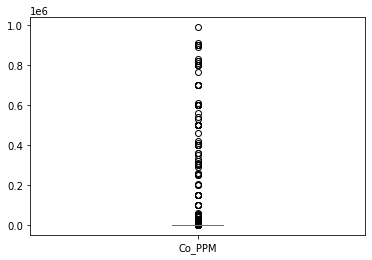

In [76]:
df_Co_ppm['Co_PPM'].plot(kind='box')

In [77]:
df_Co_corr = df_Co_ppm.corr()

In [78]:
only_co = df_Co_corr['Co_PPM'].sort_values()

In [79]:
only_co[0:5]

wamex_lat   -0.015339
V_PPM       -0.011827
Sr_PPM      -0.008000
Ga_PPM      -0.005938
Ba_PPM      -0.004661
Name: Co_PPM, dtype: float64

In [97]:
#the ones before that are NaNs because they are all 0 values in df_Co_ppm
only_co[-72:-62:]

Mg_PPM      0.034541
MgO_PPM     0.044813
V2O5_PPM    0.072368
Pt_PPM      0.094230
Au_PPM      0.116734
Pd_PPM      0.147997
S_PPM       0.148307
Cr_PPM      0.251589
Cu_PPM      0.464750
Co_PPM      1.000000
Name: Co_PPM, dtype: float64

In [81]:
only_minedex_co = df_Co_corr['Co_PPM'][['Ni_PPM','Cu_PPM','Co_PPM', 'Pd_PPM', 'Au_PPM','Pt_PPM', 'Rh_PPM', 'Fe_PPM', 'S_PPM', 'Ag_PPM', 'wamex_lon', 'wamex_lat']]

In [82]:
only_minedex_co['dataframe'] = 'WAMEX Drillhole'

In [83]:
only_minedex_co

Ni_PPM              0.004832
Cu_PPM               0.46475
Co_PPM                   1.0
Pd_PPM              0.147997
Au_PPM              0.116734
Pt_PPM               0.09423
Rh_PPM              0.000589
Fe_PPM             -0.002482
S_PPM               0.148307
Ag_PPM             -0.002558
wamex_lon           0.004941
wamex_lat          -0.015339
dataframe    WAMEX Drillhole
Name: Co_PPM, dtype: object

In [ ]:
df_Co_corr

In [98]:
only_minedex_co.to_csv('Co_correlations_WACHEM.csv')

## Indium/germanium

In [99]:
Merged_Zn_Drillhole_lessthan15km = pd.read_csv('Merged_Zn_Drillhole_lessthan15km.csv')

#remove duplicates
df_Ge_In = Merged_Zn_Drillhole_lessthan15km.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Latitude', 'Longitude', 
                     'minedex_coords', 'minedex_site',
                    'distance'])

df_Ge_In = df_Ge_In.drop_duplicates()
df_Ge_In.head()

,CollarId,CompanyHoleId,HoleType,Azimuth,Dip,MaxDepth,Anumber,SampleId,CompanySampleId,FromDepth,...,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM,wamex_lat,wamex_lon
0,1569256,DED021,DD,360,-90,420.7,86949,36316448,2101007,335.17,...,8.1,-9999.0,-9999.0,-9999.0,782.0,-9999.0,78.1,-9999.0,-28.401474,120.859059
4,1569256,DED021,DD,360,-90,420.7,86949,36316437,2100995,325.00,...,10.8,-9999.0,-9999.0,-9999.0,114.0,-9999.0,20.2,-9999.0,-28.401474,120.859059
8,1569256,DED021,DD,360,-90,420.7,86949,36316353,2100905,195.00,...,19.7,-9999.0,-9999.0,-9999.0,81.0,-9999.0,39.1,-9999.0,-28.401474,120.859059
12,1569256,DED021,DD,360,-90,420.7,86949,36316350,2100902,192.00,...,16.7,-9999.0,-9999.0,-9999.0,81.0,-9999.0,34.0,-9999.0,-28.401474,120.859059
16,1569256,DED021,DD,360,-90,420.7,86949,36316358,2100911,200.00,...,17.5,-9999.0,-9999.0,-9999.0,76.0,-9999.0,34.4,-9999.0,-28.401474,120.859059


In [98]:
df_Ge_In.shape

(3845, 171)

In [102]:
#as indicated by the client, Ni > 300,000 is close to impossible, therefore we remove such rows
df_Co = df_Co[df_Co['Ni_PPM'] <=300000]

In [103]:
#we only keep rows where Ni is positive.
df_Co = df_Co[df_Co['Ni_PPM'] >0]
df_Co.shape

(70159, 96)

In [104]:
df_Co['Co_PPM'].describe()

count     70159.000000
mean        732.682043
std       18827.417351
min           0.000100
25%          50.000000
50%          88.000000
75%         120.000000
max      990000.000000
Name: Co_PPM, dtype: float64

In [105]:
#there's only a few values => 300k, so we remove these outliers
df_Co[df_Co['Co_PPM'] >=300000].shape

(63, 96)

In [106]:
df_Co = df_Co[df_Co['Co_PPM'] <=300000]

<AxesSubplot:ylabel='Co_PPM'>

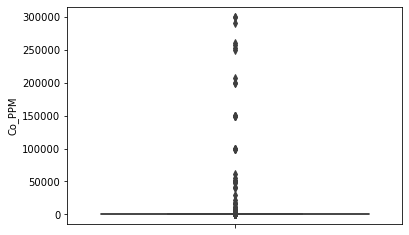

In [107]:
#most values are close to 0
sns.boxplot(y = df_Co['Co_PPM'])

In [125]:
#replace all -9999 values to 0
def replace_neg9999(val): #eli's function
    if val == -9999: 
        return 0
    else:
        return val

In [126]:
df_Co = df_Co.applymap(replace_neg9999)

In [127]:
corr_co = df_Co.corr()

In [128]:
corr_co['Co_PPM'].sort_values()[1:10]

Sr_PPM   -0.010064
Ga_PPM   -0.007801
Ba_PPM   -0.007140
Ce_PPM   -0.006100
Hf_PPM   -0.005855
La_PPM   -0.005776
Sm_PPM   -0.004784
Er_PPM   -0.004631
Eu_PPM   -0.004442
Name: Co_PPM, dtype: float64

In [131]:
corr_co['Co_PPM'].sort_values()[-15:]

Al_PPM       0.019193
CaO_PPM      0.020583
TiO2_PPM     0.030183
Ni_PPM       0.061569
Al2O3_PPM    0.066905
S_PPM        0.075329
P2O5_PPM     0.076420
Y_PPM        0.082347
SiO2_PPM     0.095274
Pt_PPM       0.304031
Cu_PPM       0.322329
V2O5_PPM     0.408533
Pd_PPM       0.527434
Au_PPM       0.531379
Co_PPM       1.000000
Name: Co_PPM, dtype: float64

In [132]:
only_minedex_co = df_Co[['Ni_PPM', 'Cu_PPM', 'Pd_PPM', 'Au_PPM', 'Pt_PPM', 'Rh_PPM', 'Fe_PPM', 'S_PPM', 'Ag_PPM', 'Co_PPM']].corr()

In [156]:
only_minedex_co['Co_PPM'].sort_values()

Ag_PPM   -0.003877
Fe_PPM   -0.002419
Rh_PPM    0.006835
Ni_PPM    0.061569
S_PPM     0.075329
Pt_PPM    0.304031
Cu_PPM    0.322329
Pd_PPM    0.527434
Au_PPM    0.531379
Co_PPM    1.000000
Name: Co_PPM, dtype: float64

#### Germanium & Indium

<AxesSubplot:ylabel='Zn_PPM'>

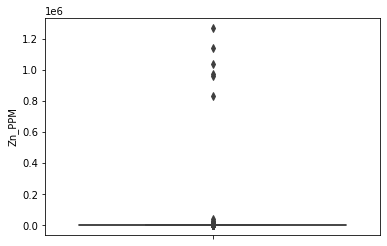

In [113]:
#some large outlier
sns.boxplot(y = df_Ge_In[df_Ge_In['Zn_PPM'] >0]['Zn_PPM'])

In [114]:
df_Ge_In['Zn_PPM'].describe()

count    3.845000e+03
mean     5.499181e+02
std      4.142836e+04
min     -9.999000e+03
25%      3.800000e+01
50%      7.100000e+01
75%      1.050000e+02
max      1.270000e+06
Name: Zn_PPM, dtype: float64

In [115]:
df_Ge_In[df_Ge_In['Zn_PPM'] >=300000].shape

(6, 88)

In [116]:
df_Ge_In = df_Ge_In[df_Ge_In['Zn_PPM'] <=300000]

In [117]:
#only keep where Zn is positive
df_Ge_In = df_Ge_In[df_Ge_In['Zn_PPM'] >0]

In [134]:
#replace -9999 with 0
df_Ge_In = df_Ge_In.applymap(replace_neg9999)

In [135]:
df_Ge = df_Ge_In[df_Ge_In['Ge_PPM'] >0] #only keep where Ge > 0
df_In = df_Ge_In[df_Ge_In['In_PPM'] >0] #only keep where In > 0

In [136]:
df_Ge.shape

(1757, 88)

In [137]:
df_In.shape

(3349, 88)

In [138]:
corr_ge = df_Ge.corr()

In [139]:
corr_ge['Ge_PPM'].sort_values()[1:10]

Sc_PPM   -0.146697
V_PPM    -0.133531
Sr_PPM   -0.105762
Ba_PPM   -0.081389
P_PPM    -0.079056
Cr_PPM   -0.077398
Al_PPM   -0.052401
La_PPM   -0.052343
Ce_PPM   -0.052238
Name: Ge_PPM, dtype: float64

In [143]:
corr_ge['Ge_PPM'].sort_values()[-15:]

Zr_PPM    0.311247
Eu_PPM    0.316923
Ho_PPM    0.350182
Tb_PPM    0.369690
Mo_PPM    0.467679
W_PPM     0.570580
In_PPM    0.631729
Dy_PPM    0.786606
Sn_PPM    0.793925
Ge_PPM    1.000000
Ir_PPM         NaN
Os_PPM         NaN
Rh_PPM         NaN
Ru_PPM         NaN
Si_PPM         NaN
Name: Ge_PPM, dtype: float64

The NAs are due to those columns being only 0s. 

In [144]:
df_Ge[['Ir_PPM', 'Os_PPM', 'Rh_PPM', 'Ru_PPM', 'Si_PPM']].describe()

,Ir_PPM,Os_PPM,Rh_PPM,Ru_PPM,Si_PPM
count,1757.0,1757.0,1757.0,1757.0,1757.0
mean,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


In [78]:
corr_in = df_In.corr()

In [79]:
corr_in['In_PPM'].sort_values()[1:10]

Pb_PPM    -0.041332
Hg_PPM    -0.032981
MgO_PPM   -0.027845
Y_PPM     -0.026111
Mg_PPM    -0.021137
Ca_PPM    -0.020207
Cr_PPM    -0.018690
K_PPM     -0.015507
Na_PPM    -0.014170
Name: In_PPM, dtype: float64

In [80]:
corr_in['In_PPM'].sort_values()[-10:]

Ga_PPM    0.107430
Th_PPM    0.110577
Sc_PPM    0.111411
Rb_PPM    0.118366
Co_PPM    0.132870
Au_PPM    0.156278
S_PPM     0.184135
Pd_PPM    0.225004
Ge_PPM    0.291826
In_PPM    1.000000
Name: In_PPM, dtype: float64

Cannot see Zn in there. 

In [148]:
corr_in['Ge_PPM']['Zn_PPM']

0.0313333443703401

In [154]:
corr_in['Ge_PPM']['Cu_PPM']

0.03517641818029086

In [147]:
corr_in['In_PPM']['Zn_PPM']

0.07567834689865416

In [155]:
corr_in['In_PPM']['Cu_PPM']

0.07129328862944276